In [1]:
# statndard imports
from drn_interactions.load import load_recordings, load_neurons_derived, get_drug_groups
from drn_interactions.spikes import SpikesHandler, SpikesHandlerMulti
from drn_interactions.drug import load_drug_data, DrugResponders
import numpy as np

from IPython.display import display
%load_ext autoreload
%autoreload 2

c:\Users\roryl\.conda\envs\drn38\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
spikes, clusters = load_drug_data()
spikes.head(3)

,neuron_id,bin,counts,drug,block
0,1011,-600,6,cit,pre
1,1011,-599,7,cit,pre
2,1011,-598,7,cit,pre


In [12]:
num_sessions = clusters[["session_name", "drug"]].drop_duplicates().groupby("drug").apply(len).to_frame("Number of sessions")
num_neurons = clusters.groupby("drug").apply(len).to_frame("Number of Neurons")

display(num_sessions.join(num_neurons))

,Number of sessions,Number of Neurons
drug,,
cit,7,155
sal,9,256


In [5]:
mod = DrugResponders()
# display(mod.get_anova(spikes, z=False))
# anova, coefs = mod.get_anova(spikes, clusters, z=False)
display(anova.round(3))
display(coefs.round(3))

,effect,NumDF,DenomDF,F-stat,P-val,Sig
0,block,1,336.026,9.216,0.003,**
1,drug,1,328.548,13.271,0.000,***
2,neurontype,2,326.571,72.016,0.000,***
3,block * drug,1,336.026,16.173,0.000,***
4,neurontype * block,2,336.026,16.263,0.000,***
5,neurontype * drug,2,326.571,8.543,0.000,***
6,neurontype * block * drug,2,336.026,5.176,0.006,**


,index,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
0,(Intercept),4.400,3.444,5.356,0.488,203.811,9.022,0.000,***
1,post,-0.264,-0.701,0.174,0.223,336.026,-1.181,0.238,
2,cit,0.450,-0.830,1.731,0.653,342.230,0.689,0.491,
3,sir,-2.714,-4.079,-1.350,0.696,203.811,-3.899,0.000,***
4,ff,8.793,6.836,10.750,0.999,203.812,8.805,0.000,***
5,post * cit,-1.810,-2.528,-1.092,0.366,336.026,-4.941,0.000,***
6,post * sir,0.622,-0.002,1.247,0.319,336.026,1.953,0.052,.
7,post * ff,0.638,-0.258,1.533,0.457,336.026,1.395,0.164,
8,cit * sir,0.054,-1.666,1.774,0.878,337.992,0.061,0.951,
9,cit * ff,-5.207,-8.208,-2.207,1.531,318.165,-3.401,0.001,***


In [38]:
responders = mod.get_responders(spikes, z=True)

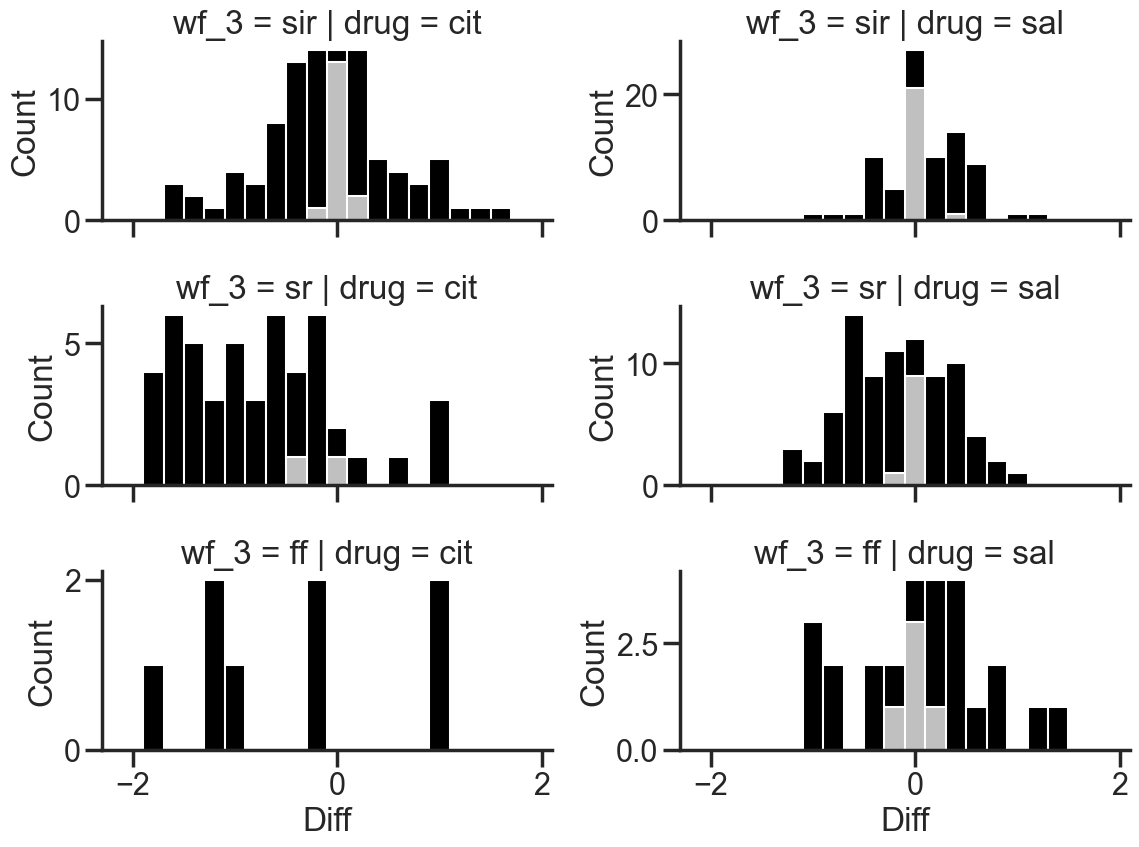

In [39]:
mod.plot_responders(responders, clusters, bins=np.arange(-2.1, 2.1, 0.2))

In [53]:
get_drug_groups().query("drug == 'sal'")

,session_name,group_name,experiment_name,drug
9,hamilton_03,acute_sal,HAMILTON,sal
14,hamilton_37,acute_sal,HAMILTON,sal
15,hamilton_35,acute_sal,HAMILTON,sal
17,hamilton_32,acute_sal,HAMILTON,sal
18,acute_15,acute_saline,CITWAY,sal
19,acute_16,acute_saline,CITWAY,sal
21,acute_14,acute_saline,CITWAY,sal
22,acute_12,acute_saline,CITWAY,sal
23,acute_11,acute_saline,CITWAY,sal


<AxesSubplot:title={'center':'hamilton_36'}>

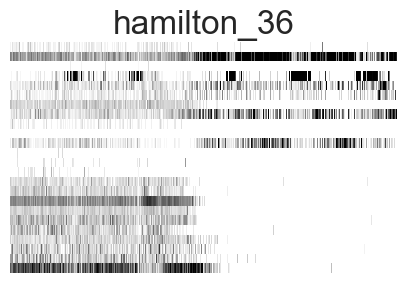

In [64]:
from drn_interactions.drug import population_raster


population_raster("hamilton_36", clusters=clusters, tfidf=True)

<AxesSubplot:title={'center':'hamilton_37'}>

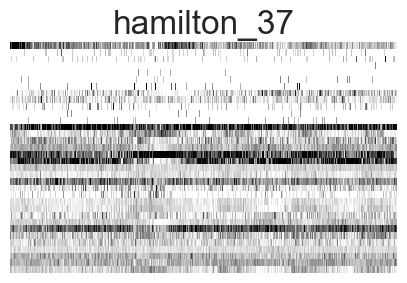

In [63]:
population_raster("hamilton_37", clusters=clusters, tfidf=True)